In [5]:
import uproot
import csv
import pandas as pd


def aplanar_lista_anidada(lista_anidada):
    """
    Aplana una lista anidada, convirtiéndola en una lista simple.
    """
    lista_aplanada = []
    for sublist in lista_anidada:
        lista_aplanada.extend(sublist)
    return lista_aplanada


def copiar_hoja_a_csv():
    """
    Abre un archivo ROOT, extrae datos de una hoja y los guarda en un archivo CSV.
    """
    # Rutas y nombres de las entidades
    ruta_archivo_root = "Events/run_01/tag_1_delphes_events.root"
    nombre_arbol = "Delphes"
    nombre_rama = "Jet"
    nombre_hoja = "Jet.Mass"
    ruta_salida_csv = "output.csv"

    # Tu código para obtener el array awkward
    datos_hoja = uproot.open(ruta_archivo_root)[
        nombre_arbol][nombre_rama][nombre_hoja]

    print("Array;", datos_hoja.array())
    print("De Array a Tolist;", datos_hoja.array().tolist())
    print("Aplanada; ", aplanar_lista_anidada(datos_hoja.array().tolist()))
    df = pd.DataFrame(datos_hoja.array().tolist())
    print("====================================================================")
    print(df)

    # Abrir el archivo ROOT y obtener el TTree
    with uproot.open(ruta_archivo_root) as archivo:
        arbol = archivo[nombre_arbol]

        # Obtener los datos de la hoja como un array awkward
        array_awkward = arbol[nombre_rama][nombre_hoja].array()

        # Aplanar la estructura anidada si está presente
        lista_aplanada = aplanar_lista_anidada(array_awkward.tolist())

        # Escribir la lista aplanada en un archivo CSV sin corchetes
        with open(ruta_salida_csv, 'w', newline='') as csvfile:
            escritor_csv = csv.writer(csvfile)
            escritor_csv.writerow([nombre_hoja])  # Escribir encabezado
            # Mapear cada elemento a una lista
            escritor_csv.writerows(map(lambda x: [x], lista_aplanada))


if __name__ == "__main__":
    # Llamar a la función para copiar datos a CSV
    copiar_hoja_a_csv()
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('output.csv')
    print("====================================================================")
    print(df)

Array; [[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]
De Array a Tolist; [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [7.794574737548828], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [9.000619888305664], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [2.7006099224090576], [],

In [6]:
# Rutas y nombres de las entidades
ruta_archivo_root = "Events/run_01/tag_1_delphes_events.root"
nombre_arbol = "Delphes"
nombre_rama = "Jet"
nombre_hoja = "Jet.Mass"
ruta_salida_csv = "output.csv"

# Tu código para obtener el array awkward
datos_hoja = uproot.open(ruta_archivo_root)[
    nombre_arbol][nombre_rama][nombre_hoja].array().tolist()

# Especifica el nombre del archivo CSV
nombre_archivo = 'datosmatriz.csv'

# Abre el archivo CSV en modo de escritura
with open(nombre_archivo, 'w', newline='') as archivo_csv:
    # Crea un escritor CSV
    escritor_csv = csv.writer(archivo_csv)

    # Escribe las filas en el archivo CSV
    for fila in datos_hoja:
        escritor_csv.writerow(fila)

print(f'Los datos se han guardado en {nombre_archivo}.')

Los datos se han guardado en datosmatriz.csv.


      Jet.Mass
0     7.794575
1     9.000620
2     2.700610
3     5.329957
4     3.903795
...        ...
1405  3.644300
1406  4.385510
1407  4.992182
1408  4.781669
1409  4.552558

[1410 rows x 1 columns]


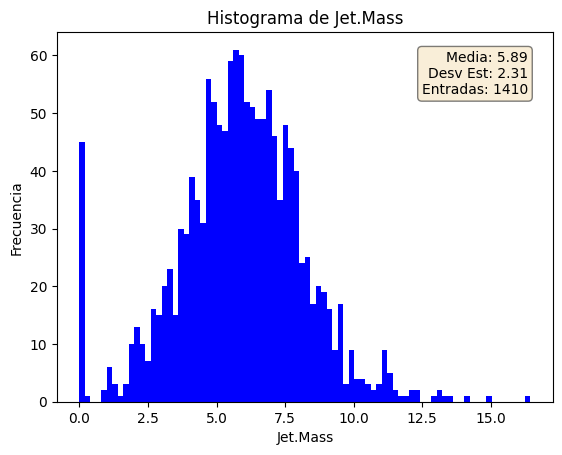

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('output.csv')
print(df)
# Seleccionar la columna de interés
columna_de_interes = 'Jet.Mass'
data = df[columna_de_interes]

# Calcular estadísticas
media = data.mean()
std_dev = data.std()
num_entradas = len(data)

# Crear el histograma
plt.hist(data, bins=82, color='blue')

# Personalizar el gráfico
plt.title('Histograma de {}'.format(columna_de_interes))
plt.xlabel(columna_de_interes)
plt.ylabel('Frecuencia')

# Agregar texto con información estadística en la esquina superior derecha
info_text = f'Media: {media:.2f}\nDesv Est: {std_dev:.2f}\nEntradas: {num_entradas}'
plt.text(0.95, 0.95, info_text, transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Mostrar el gráfico
plt.show()